In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [10]:
#looking at top 5 rows of df
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [11]:
#Looking at bottom 5 rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### Q5.)How many rows and columns are in gdp_df? What are the data types of each column?

In [12]:
gdp_df.shape

(7662, 4)

In [13]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


##### Answer: 7662 rows; 4 columns
##### column 0 Dtype = object
##### column 1 Dtype = int
##### column 2 Dtype = float
##### column 3 Dtype = float

### Q6.)Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [18]:
gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'}, inplace=True)

In [19]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   GDP_Per_Capita   7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [20]:
gdp_df.drop(columns=['Value Footnotes'], inplace=True)

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


##### Q6 Answer above^

#### Q7.) How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [56]:
gdp_df["Country"].value_counts().reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


##### Answer: any country with less than 33 as the count is mmissing years of data

### Q8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [72]:
### building table for year 2020
y2020 = gdp_df[gdp_df['Year'] ==2020].sort_values('GDP_Per_Capita', ascending=False)
y2020


,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


(array([77., 34., 42., 18., 11., 13.,  7., 12.,  7.,  8.,  4.,  1.,  3.,
         1.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([   711.35526342,   6263.35323782,  11815.35121222,  17367.34918661,
         22919.34716101,  28471.34513541,  34023.3431098 ,  39575.3410842 ,
         45127.3390586 ,  50679.337033  ,  56231.33500739,  61783.33298179,
         67335.33095619,  72887.32893058,  78439.32690498,  83991.32487938,
         89543.32285377,  95095.32082817, 100647.31880257, 106199.31677696,
        111751.31475136]),
 <BarContainer object of 20 artists>)

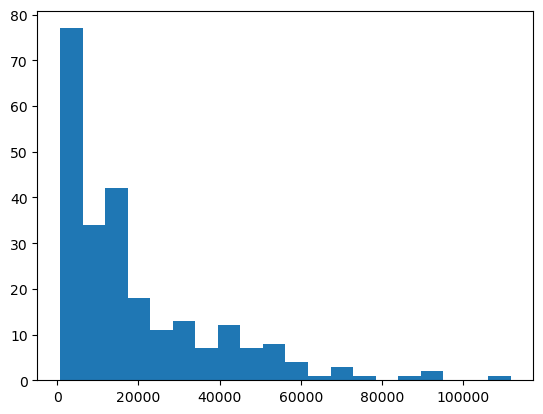

In [74]:
### histogram using matplotlib

plt.hist(y2020.GDP_Per_Capita, bins=20)


In [ ]:
### density chart

### Q9.) What was the median GDP per capita value in 2020?

In [76]:
gdp_df.groupby("Year")["GDP_Per_Capita"].median().reset_index()

,Year,GDP_Per_Capita
0,1990,6223.452994
1,1991,6360.469210
2,1992,6209.463742
3,1993,6091.534418
4,1994,6171.059251
5,1995,6749.160113
6,1996,7174.626665
7,1997,7297.913083
8,1998,7555.550529
9,1999,7806.963355


##### Answer: 2020 median GDP per capital = 13,357.99